In [24]:
#importing libraries and dataset
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
PATH_TO_DATA = r'ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
data. head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [25]:
#splitting training and testing dataset
features = data.drop(140, axis=1)
target = data[140]
x_train, x_test, y_train, y_test = train_test_split( features, target, test_size=0.2, stratify=target)
train_index = y_train[y_train==1].index
train_data = x_train.loc[train_index]

In [26]:
#scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler. fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [27]:
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(rate=0.1),
            Dense(32, activation='relu'),
            Dropout(rate=0.1),
            Dense(16, activation='relu'),
            Dropout(rate=0.1),
            Dense(ldim, activation='relu')
        ])
        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(rate=0.1),
            Dense(32, activation='relu'),
            Dropout(rate=0.1),
            Dense(64, activation='relu'),
            Dropout(rate=0.1),
            Dense(output_units, activation='sigmoid')
        ])
        
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded


In [28]:
#model configuration
model = AutoEncoder(output_units=x_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')
epochs = 20
history = model.fit(
x_train_scaled,
x_train_scaled,
epochs=epochs,
batch_size=512,
validation_data=(x_test_scaled, x_test_scaled))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0117 - mse: 0.0267 - val_loss: 0.0145 - val_mse: 0.0338
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0113 - mse: 0.0258 - val_loss: 0.0142 - val_mse: 0.0332
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0107 - mse: 0.0244 - val_loss: 0.0138 - val_mse: 0.0322
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0096 - mse: 0.0218 - val_loss: 0.0138 - val_mse: 0.0320
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - mse: 0.0192 - val_loss: 0.0135 - val_mse: 0.0313
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - mse: 0.0162 - val_loss: 0.0128 - val_mse: 0.0296
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mse: 0.0138 - val_loss: 0.0126 - val_mse: 0.0291
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mse: 0.0120 - val_loss: 0.0118 - val_mse: 0.0272
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0048 - mse: 0.0108 - val_

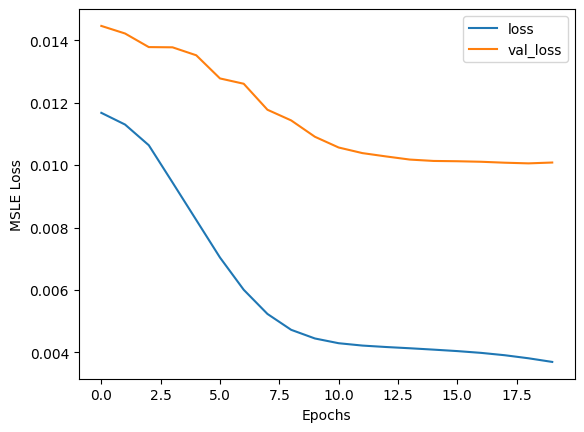

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel( 'MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [37]:
#finding threshold for anomaly and doing predictions
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0 if x == True else 1)
    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
Threshold: 0.00811545315520741


In [42]:

#getting accuracy score
predictions = get_predictions(model, x_test_scaled, threshold)
# predictions = (get_predictions(model, x_test_scaled, threshold) > 0.5).astype(int) 
accuracy_score(predictions, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.923

In [43]:
y_test

1866    1.0
1612    1.0
687     1.0
413     0.0
1934    1.0
       ... 
3436    0.0
4463    0.0
754     1.0
2538    1.0
2353    1.0
Name: 140, Length: 1000, dtype: float64